In [87]:
import os
import tarfile
import pandas as pd
from six.moves import urllib
import matplotlib as plt
import numpy as np
#import tensorflow as tf

download_root="https://github.com/ageron/handson-ml/tree/master/"
HOUSING_PATH="datasets/housing"
housing_url=download_root+HOUSING_PATH+"/housing.tgz"

def fetch_housing_data(housing_url=housing_url,HOUSING_PATH=HOUSING_PATH):
    if not os.path.isdir(HOUSING_PATH):
        os.makedirs(HOUSING_PATH)
    tgz_path= os.path.join(HOUSING_PATH, "housing.tgz")
    #print(tgz_path)
    #urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=HOUSING_PATH)
    housing_tgz.close()


def load_housing_data():
    csv_path=os.path.join(HOUSING_PATH, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing=load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [88]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF1ABB1898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BF1AC71860>]], dtype=object)

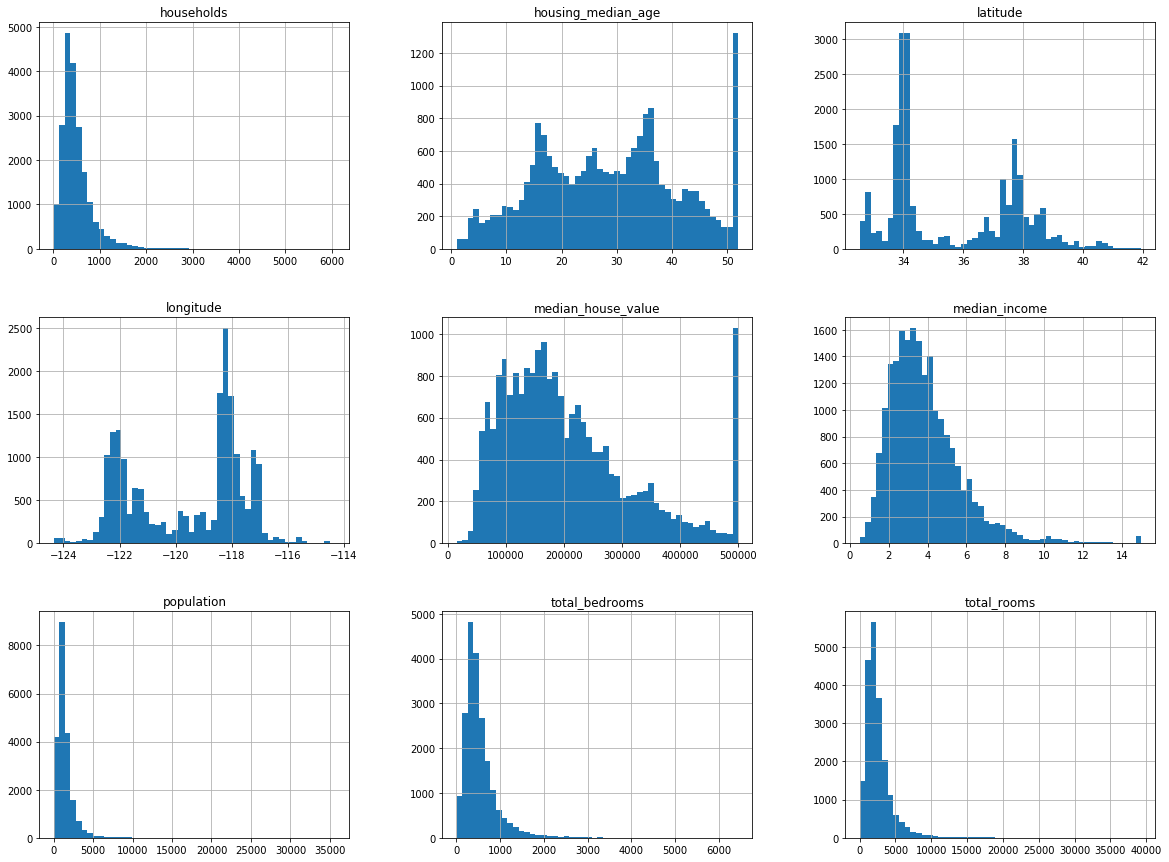

In [89]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [90]:
"""
import numpy as np

def split(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

trainset, testset=split(housing, 0.2)
print(len(testset), len(trainset))
"""

'\nimport numpy as np\n\ndef split(data, test_ratio):\n    shuffled_indices=np.random.permutation(len(data))\n    test_set_size=int(len(data)*test_ratio)\n    test_indices=shuffled_indices[:test_set_size]\n    train_indices=shuffled_indices[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\n\ntrainset, testset=split(housing, 0.2)\nprint(len(testset), len(trainset))\n'

In [91]:
from sklearn.model_selection import *

trainset, testset=train_test_split(housing, test_size=0.2, random_state=42)
print(len(trainset), len(testset))

16512 4128


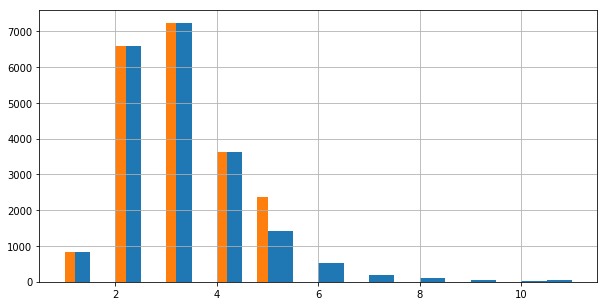

In [92]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].hist(bins=20, figsize=(10, 5))
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)
housing["income_cat"].hist(bins=20, figsize=(10, 5))


In [93]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_trainset=housing.loc[train_index]
    strat_testset=housing.loc[test_index]

print(strat_testset, strat_trainset)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
20552    -121.80     38.68                11.0       3851.0           892.0   
19989    -119.32     36.19                11.0       1281.0           291.0   
17049    -122.26     37.46                26.0       5067.0           750.0   
13692    -117.24     34.13                26.0       3774.0           716.0   
13916    -116.15     34.14                18.0       3312.0           705.0   
20374    -118.84     34.16                18.0       6075.0          1056.0   
18776    -122.27     40.46                14.0      

In [94]:
for i in (strat_trainset, strat_testset):
    i.drop("income_cat", axis=1, inplace=True)

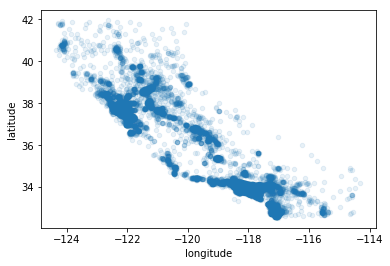

In [95]:
housing=strat_trainset.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

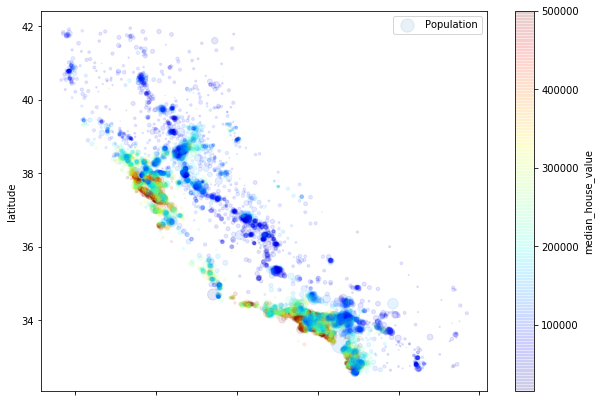

In [96]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=housing["population"]/100, label="Population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


In [97]:
corr_matrix=housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [98]:
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


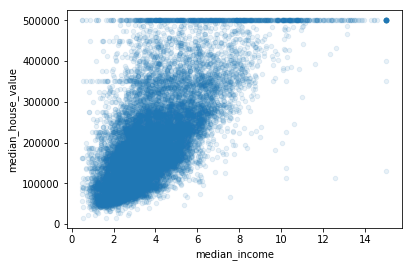

In [99]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


In [100]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [101]:
corr_matrix=housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


In [102]:
housing=strat_trainset.drop("median_house_value", axis=1)
housing_labels=strat_trainset["median_house_value"].copy()

In [103]:
from sklearn.preprocessing import Imputer
imputer= Imputer(strategy="median")

housing_num=housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [104]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [105]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [106]:
X=imputer.transform(housing_num)

In [107]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [108]:
print(housing_tr)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -121.89     37.29                38.0       1568.0           351.0   
1        -121.93     37.05                14.0        679.0           108.0   
2        -117.20     32.77                31.0       1952.0           471.0   
3        -119.61     36.31                25.0       1847.0           371.0   
4        -118.59     34.23                17.0       6592.0          1525.0   
5        -120.97     37.66                24.0       2930.0           588.0   
6        -118.50     34.04                52.0       2233.0           317.0   
7        -117.24     34.15                26.0       2041.0           293.0   
8        -118.26     33.99                47.0       1865.0           465.0   
9        -118.28     34.02                29.0        515.0           229.0   
10       -121.31     38.02                24.0       4157.0           951.0   
11       -121.62     39.14                41.0      

In [109]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [110]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [111]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [112]:
housing_cat_1hot.toarray()


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [113]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household=X[:, rooms_ix]/X[:, household_ix]
        population_per_household=X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_addr=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_addr.transform(housing.values)
print(housing_extra_attribs)

[[-121.89 37.29 38.0 ..., '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ..., '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ..., 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ..., 
 [-116.4 34.09 9.0 ..., 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ..., '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ..., 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [116]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [117]:
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
num_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline= Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('local_binarizer', LabelBinarizer())
])


In [118]:
from sklearn.pipeline import FeatureUnion

full_pipeline= FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [120]:
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)

[[-1.15604281  0.77194962  0.74333089 ...,  0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...,  0.          0.          0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...,  0.          0.          1.        ]
 ..., 
 [ 1.58648943 -0.72478134 -1.56295222 ...,  0.          0.          0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...,  0.          0.          0.        ]
 [-1.43579109  0.99645926  1.85670895 ...,  0.          1.          0.        ]]


In [128]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepd=full_pipeline.transform(some_data)
print("predictions: ", lin_reg.predict(some_data_prepd))
print("labels: ", list(some_labels))


ValueError: shapes (5,14) and (16,) not aligned: 14 (dim 1) != 16 (dim 0)